## PRIMER ANÁLISIS CON TIO

### Gráfica de reflectancia

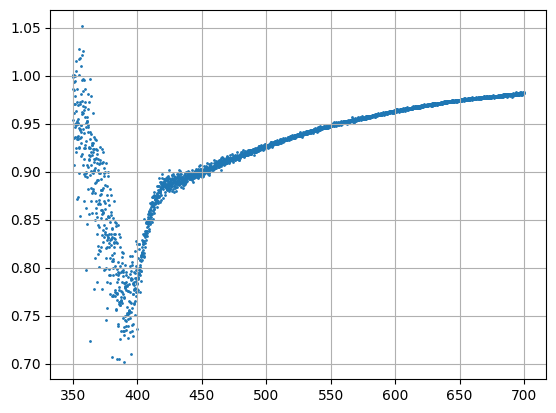

In [97]:
import pandas as pd
import numpy as np



df_referencia = pd.read_csv("ref_tio.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_muestra = pd.read_csv("muestra_tio.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_dark = pd.read_csv("dark_tio.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])

longitud_onda = np.array(df_referencia.iloc[:-1,0].values, dtype=float)
radiancia_referencia = df_referencia.iloc[:-1,1].values
radiancia_muestra = df_muestra.iloc[:-1,1].values
radiancia_dark = df_dark.iloc[:-1,1].values


reflectancia = np.array(  (radiancia_muestra - radiancia_dark) / (radiancia_referencia - radiancia_dark))
import matplotlib.pyplot as plt
import numpy as np
mask = (longitud_onda>350) & (longitud_onda<700)

plt.scatter(longitud_onda[mask], reflectancia[mask], s=1)
plt.grid()
plt.show()



### Uso de Kubelka-Munk

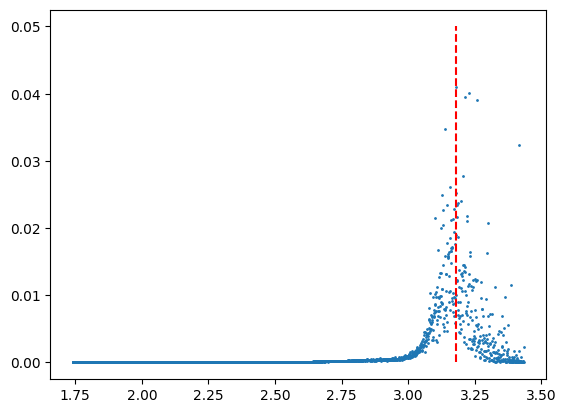

In [104]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)



y0 = (F[mask]* x[mask]  )**(1/n[0])
plt.scatter(x[mask],y0, s=1 )
plt.plot([x[mask][np.where(y0 == np.max(y0))[0][0]], x[mask][np.where(y0 == np.max(y0))[0][0]]], [0, 0.05], "r--")
plt.show()

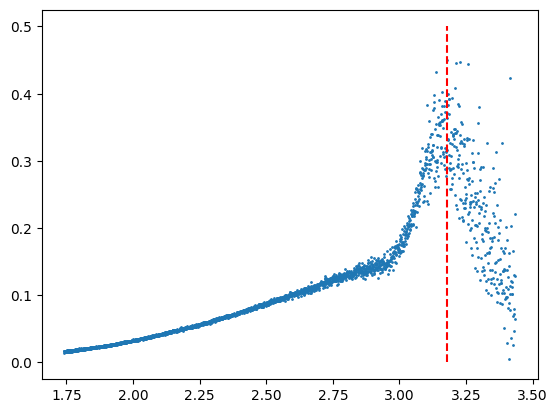

In [105]:
y1 = (F[mask]* x[mask]  )**(1/n[1])
plt.scatter(x[mask],y1, s=1 )
plt.plot([x[mask][np.where(y1 == np.max(y1))[0][0]], x[mask][np.where(y1 == np.max(y1))[0][0]]], [0, 0.5], "r--")
plt.show()

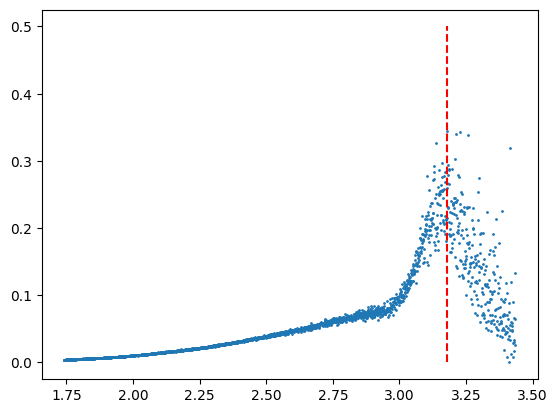

In [106]:
y2 = (F[mask]* x[mask]  )**(1/n[2])
plt.scatter(x[mask],y2, s=1 )
plt.plot([x[mask][np.where(y2 == np.max(y2))[0][0]], x[mask][np.where(y2 == np.max(y2))[0][0]]], [0, 0.5], "r--")
plt.show()

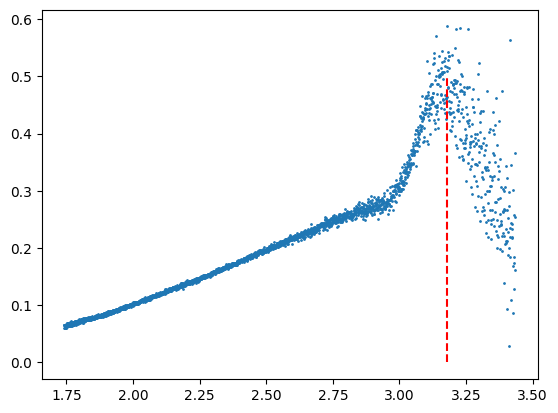

In [107]:
y3 = (F[mask]* x[mask]  )**(1/n[3])
plt.scatter(x[mask],y3, s=1 )
plt.plot([x[mask][np.where(y3 == np.max(y3))[0][0]], x[mask][np.where(y3 == np.max(y3))[0][0]]], [0, 0.5], "r--")
plt.show()

### REGRESIÓN LINEAL

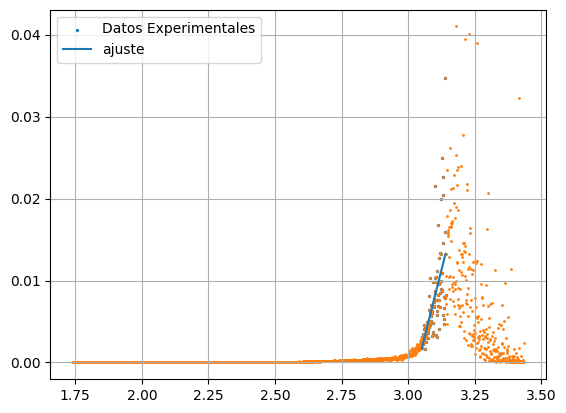

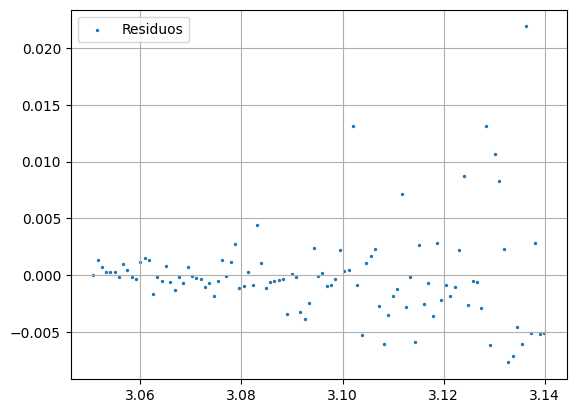

-3.0372274377165875 0.4009703255222071


In [125]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y0 == np.max(y0))[0][0]]

mask_lin = (x>3.05) & (x<3.14) 

x_lin0 = x[mask_lin]
y_lin0 = (F[mask_lin]* x[mask_lin]  )**(1/n[0])


slope, intercept, r_value, p_value, std_err = linregress(x_lin0, y_lin0)

plt.scatter(x_lin0, y_lin0, s=2, label = 'Datos Experimentales')
plt.plot(x_lin0, slope*x_lin0 + intercept, label = 'ajuste')
plt.scatter(x[mask],y0, s=1 )
plt.legend()
plt.grid()
plt.show()
plt.scatter(x_lin0, y_lin0- (slope*x_lin0 + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope), r_value**2)



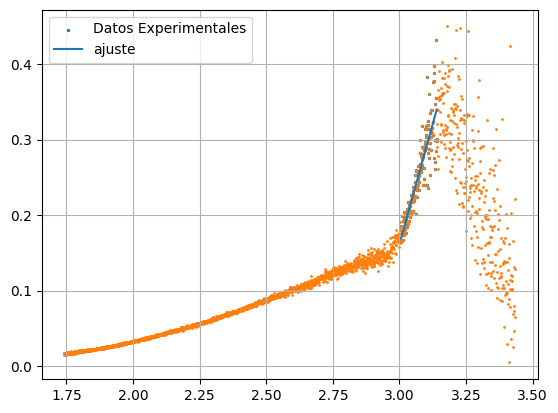

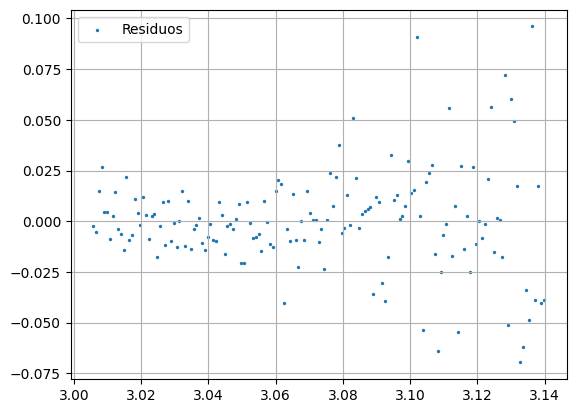

-2.8731046739875983 0.8024052483804747


In [128]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y1 == np.max(y1))[0][0]]

mask_lin = (x>3.005) & (x<3.14) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[1])
# mask_joda = y_lin<.36
# x_lin = x_lin[mask_joda]
# y_lin = y_lin[mask_joda]

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y1, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)


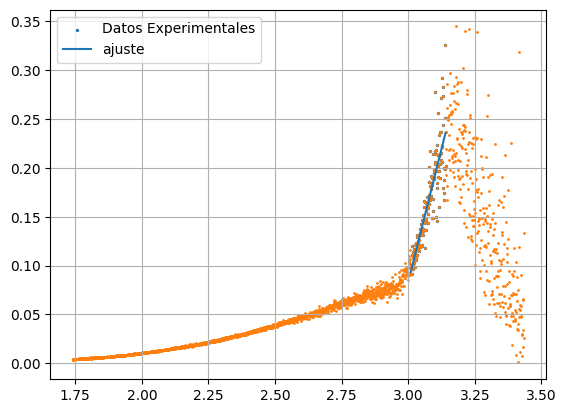

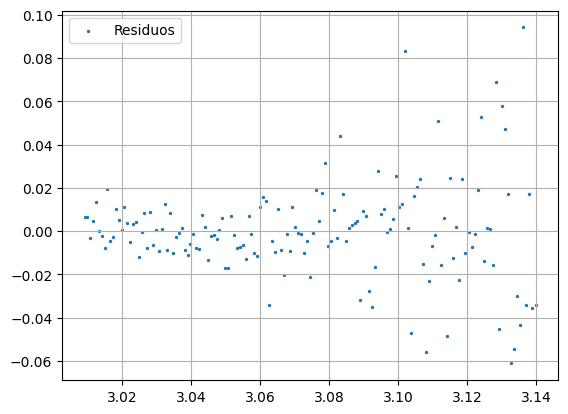

-2.9235260913236436 0.7756563998374844


In [132]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y2 == np.max(y2))[0][0]]

mask_lin = (x>3.009) & (x<3.14) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[2])

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y2, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)

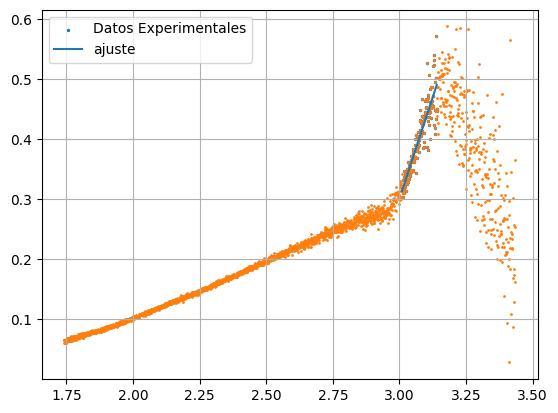

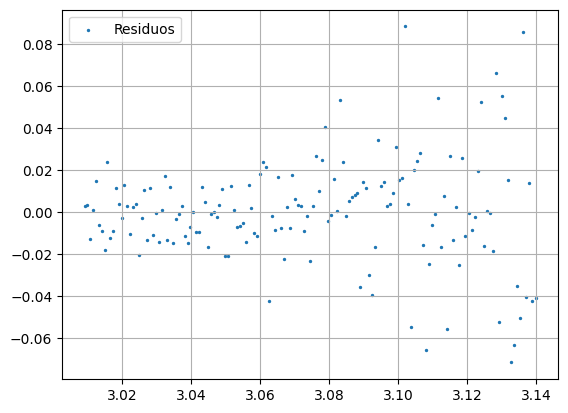

-2.776981154627416 0.8104491208497692


In [133]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y3 == np.max(y3))[0][0]]

mask_lin = (x>3.009) & (x<3.14) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[3])

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y3, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)

## SEGUNDO ANÁLISIS CON TIO

### Gráfica de reflectancia

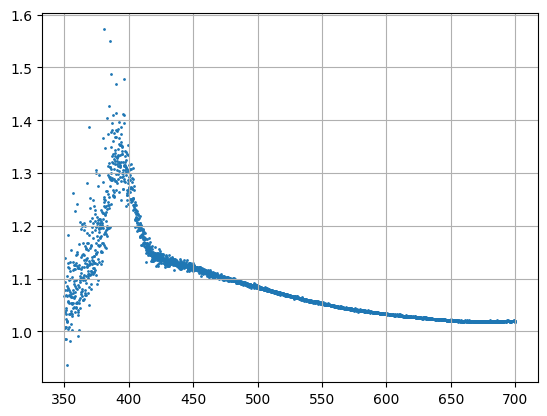

In [153]:
import pandas as pd
import numpy as np



df_referencia = pd.read_csv("ref_tio_1.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_muestra = pd.read_csv("muestra_tio_1.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_dark = pd.read_csv("dark_tio.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])

longitud_onda = np.array(df_referencia.iloc[:-1,0].values, dtype=float)
radiancia_referencia = df_referencia.iloc[:-1,1].values
radiancia_muestra = df_muestra.iloc[:-1,1].values
radiancia_dark = df_dark.iloc[:-1,1].values


reflectancia = np.array(  (radiancia_muestra - radiancia_dark) / (radiancia_referencia - radiancia_dark))
import matplotlib.pyplot as plt
import numpy as np
mask = (longitud_onda>350) & (longitud_onda<700)

plt.scatter(longitud_onda[mask], reflectancia[mask], s=1)
plt.grid()
plt.show()



### Uso de Kubelka-Munk

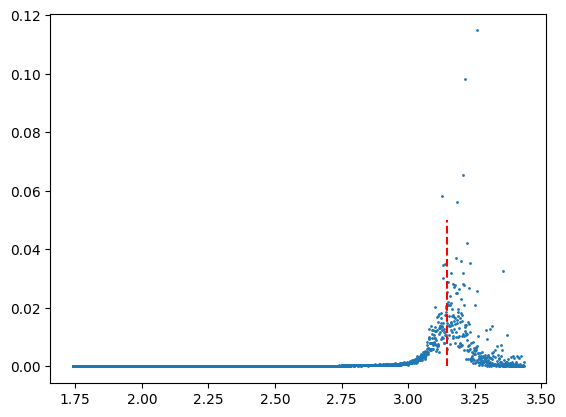

In [154]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)




y0 = (F[mask]* x[mask]  )**(1/n[0])
plt.scatter(x[mask],y0, s=1 )
plt.plot([3.145, 3.145], [0, 0.05], "r--")
plt.show()

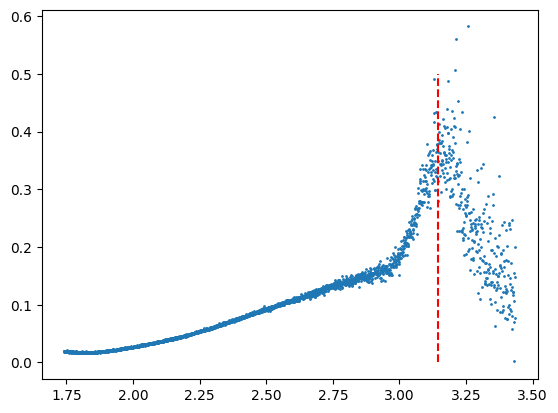

In [155]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)




y1 = (F[mask]* x[mask]  )**(1/n[1])
plt.scatter(x[mask],y1, s=1 )
plt.plot([3.145, 3.145], [0, 0.5], "r--")
plt.show()

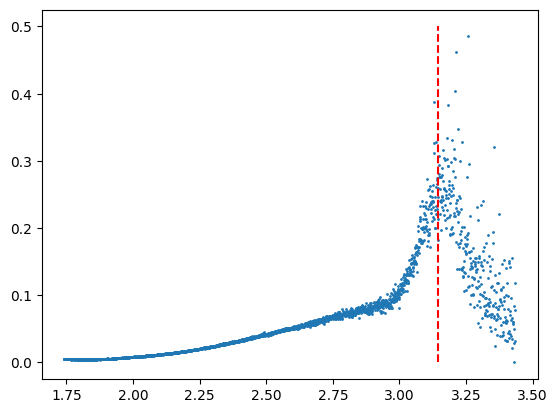

In [156]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)




y2 = (F[mask]* x[mask]  )**(1/n[2])
plt.scatter(x[mask],y2, s=1 )
plt.plot([3.145, 3.145], [0, 0.5], "r--")
plt.show()

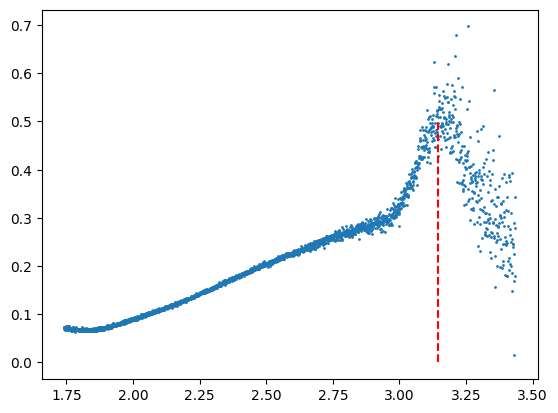

In [157]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)




y3 = (F[mask]* x[mask]  )**(1/n[3])
plt.scatter(x[mask],y3, s=1 )
plt.plot([3.145, 3.145], [0, 0.5], "r--")
plt.show()

### Regresión lineal

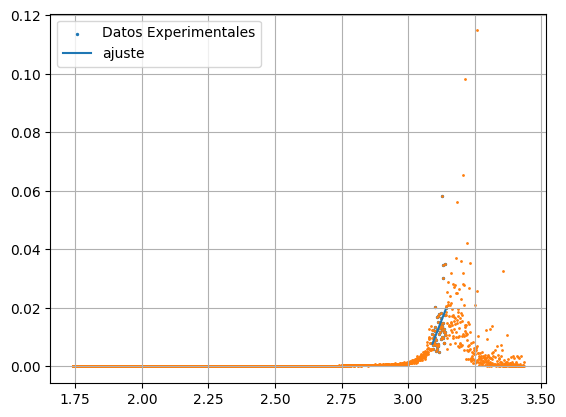

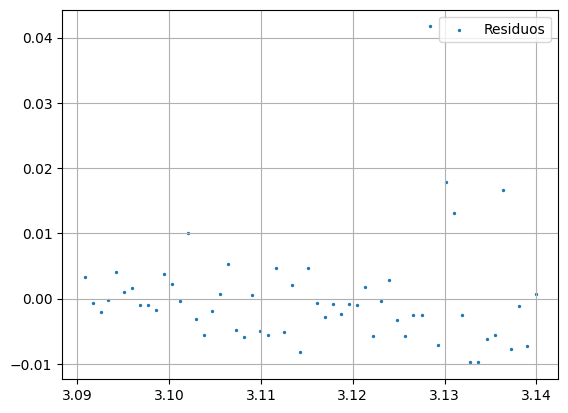

-3.057975836334778 0.15665222993343572


In [158]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y0 == np.max(y0))[0][0]]

mask_lin = (x>3.09) & (x<3.14) 

x_lin0 = x[mask_lin]
y_lin0 = (F[mask_lin]* x[mask_lin]  )**(1/n[0])


slope, intercept, r_value, p_value, std_err = linregress(x_lin0, y_lin0)

plt.scatter(x_lin0, y_lin0, s=2, label = 'Datos Experimentales')
plt.plot(x_lin0, slope*x_lin0 + intercept, label = 'ajuste')
plt.scatter(x[mask],y0, s=1 )
plt.legend()
plt.grid()
plt.show()
plt.scatter(x_lin0, y_lin0- (slope*x_lin0 + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope), r_value**2)

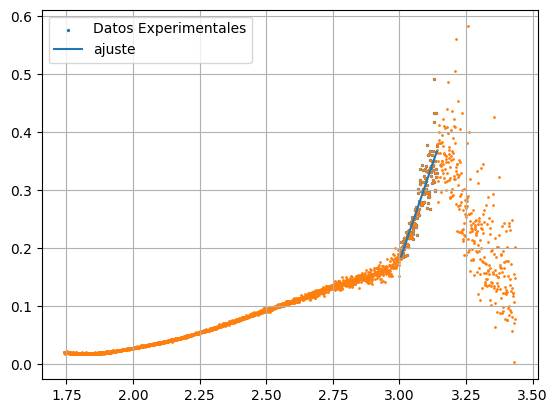

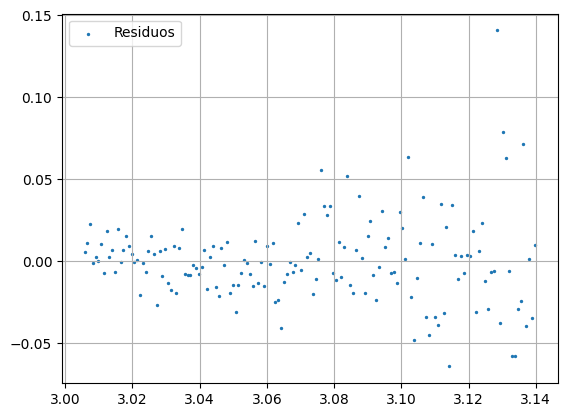

-2.8691179172997363 0.8077071104715001


In [161]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y1 == np.max(y1))[0][0]]

mask_lin = (x>3.005) & (x<3.14) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[1])
# mask_joda = y_lin<.36
# x_lin = x_lin[mask_joda]
# y_lin = y_lin[mask_joda]

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y1, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)

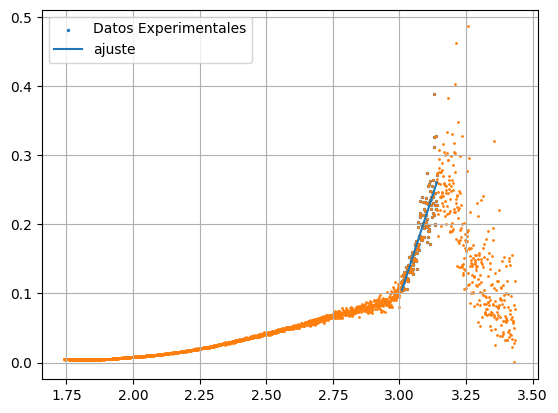

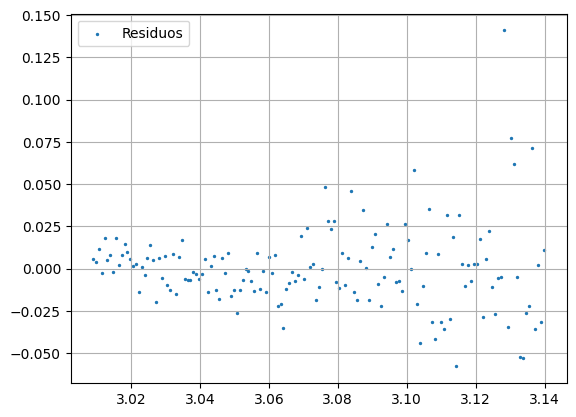

-2.9208888300564686 0.7787853231246967


In [162]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y2 == np.max(y2))[0][0]]

mask_lin = (x>3.009) & (x<3.14) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[2])

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y2, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)

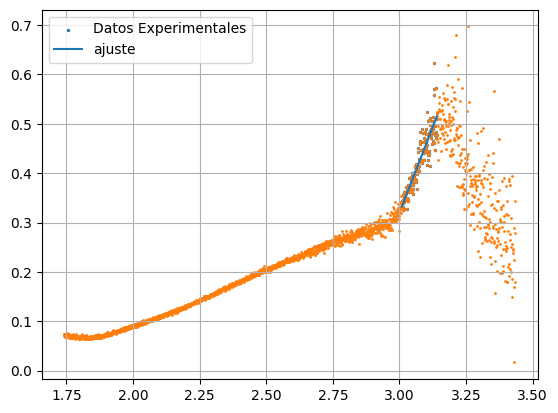

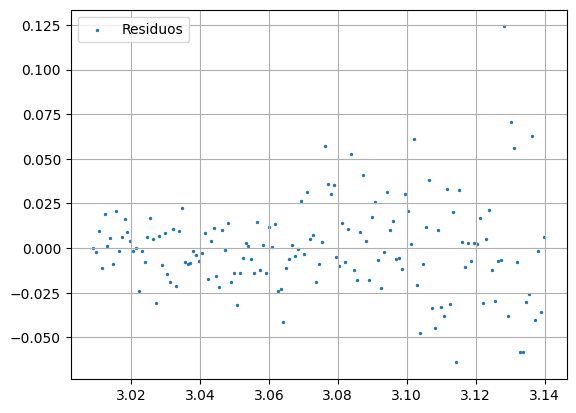

-2.7708609706544647 0.8169304522812918


In [163]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y3 == np.max(y3))[0][0]]

mask_lin = (x>3.009) & (x<3.14) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[3])

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y3, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)

## ANÁLISIS CON ZnO

### Gráfica de reflectancia

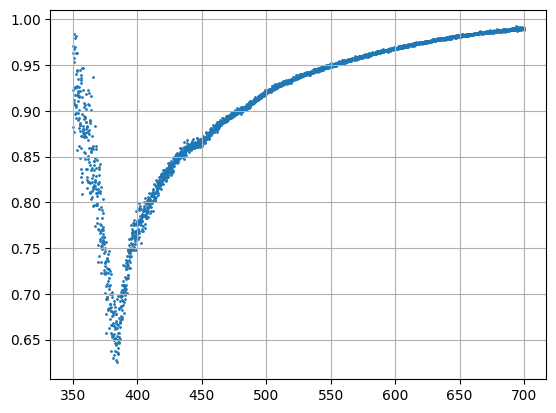

In [167]:
import pandas as pd
import numpy as np



df_referencia = pd.read_csv("ref_zio.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_muestra = pd.read_csv("muestra_zio.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_dark = pd.read_csv("dark_zio.csv", skiprows=54, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])

longitud_onda = np.array(df_referencia.iloc[:-1,0].values, dtype=float)
radiancia_referencia = df_referencia.iloc[:-1,1].values
radiancia_muestra = df_muestra.iloc[:-1,1].values
radiancia_dark = df_dark.iloc[:-1,1].values


reflectancia = np.array(  (radiancia_muestra - radiancia_dark) / (radiancia_referencia - radiancia_dark))
import matplotlib.pyplot as plt
import numpy as np
mask = (longitud_onda>350) & (longitud_onda<700)

plt.scatter(longitud_onda[mask], reflectancia[mask], s=1)
plt.grid()
plt.show()

### Uso de Kubelka-Munk

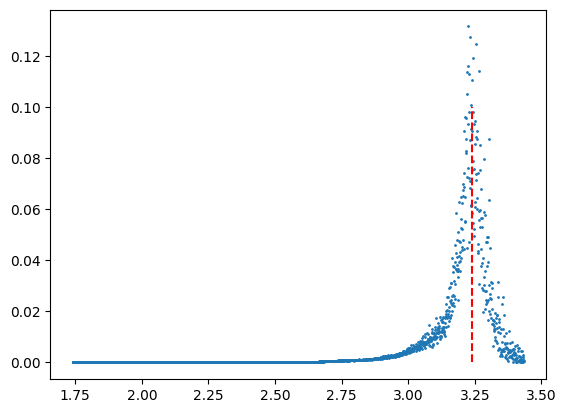

In [173]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)




y0 = (F[mask]* x[mask]  )**(1/n[0])
plt.scatter(x[mask],y0, s=1 )
plt.plot([3.24, 3.24], [0, 0.1], "r--")
plt.show()

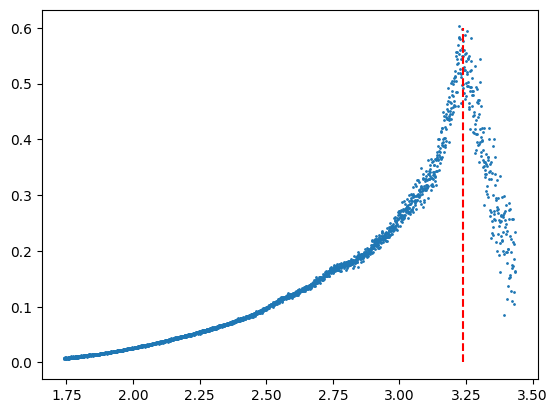

In [174]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)




y1 = (F[mask]* x[mask]  )**(1/n[1])
plt.scatter(x[mask],y1, s=1 )
plt.plot([3.24, 3.24], [0, 0.6], "r--")
plt.show()

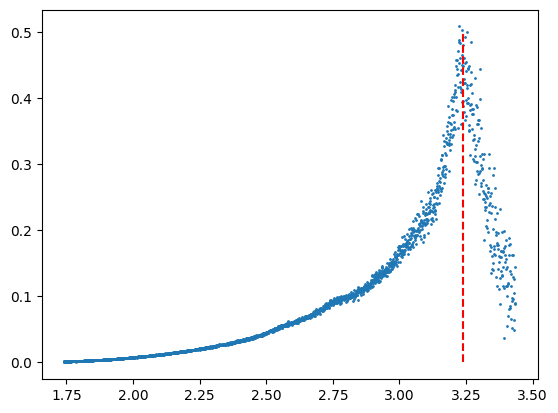

In [176]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)




y2 = (F[mask]* x[mask]  )**(1/n[2])
plt.scatter(x[mask],y2, s=1 )
plt.plot([3.24, 3.24], [0, 0.5], "r--")
plt.show()

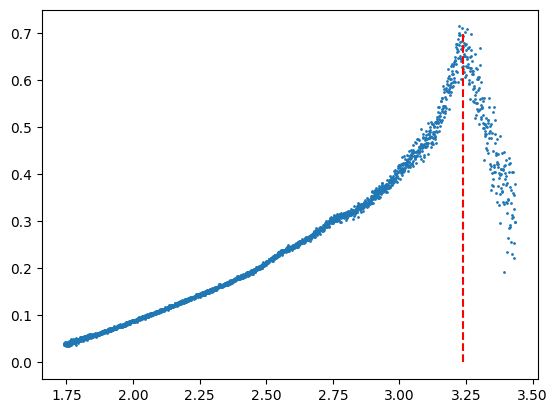

In [178]:
from scipy.constants import h,c,e
import matplotlib.pyplot as plt
import numpy as np
F = (1-reflectancia)**2 / (2*reflectancia)
F = np.flip(F)
n = [1/2, 2, 3/2, 3]
x = ((h*c / longitud_onda) / e )* 1e9
x = np.flip(x)




y3 = (F[mask]* x[mask]  )**(1/n[3])
plt.scatter(x[mask],y3, s=1 )
plt.plot([3.24, 3.24], [0, 0.7], "r--")
plt.show()

### Regresión lineal

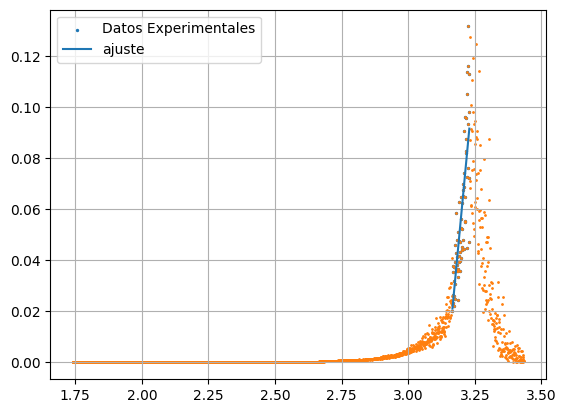

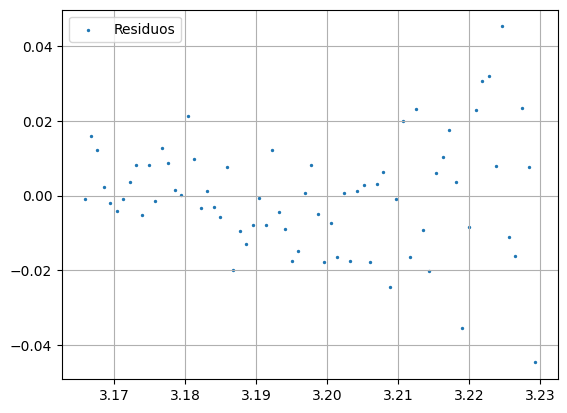

-3.1469013284571585 0.6497666199398104


In [184]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y0 == np.max(y0))[0][0]]

mask_lin = (x>3.165) & (x<3.23) 

x_lin0 = x[mask_lin]
y_lin0 = (F[mask_lin]* x[mask_lin]  )**(1/n[0])


slope, intercept, r_value, p_value, std_err = linregress(x_lin0, y_lin0)

plt.scatter(x_lin0, y_lin0, s=2, label = 'Datos Experimentales')
plt.plot(x_lin0, slope*x_lin0 + intercept, label = 'ajuste')
plt.scatter(x[mask],y0, s=1 )
plt.legend()
plt.grid()
plt.show()
plt.scatter(x_lin0, y_lin0- (slope*x_lin0 + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope), r_value**2)

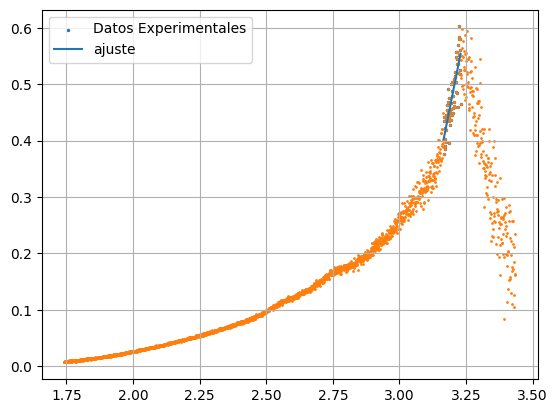

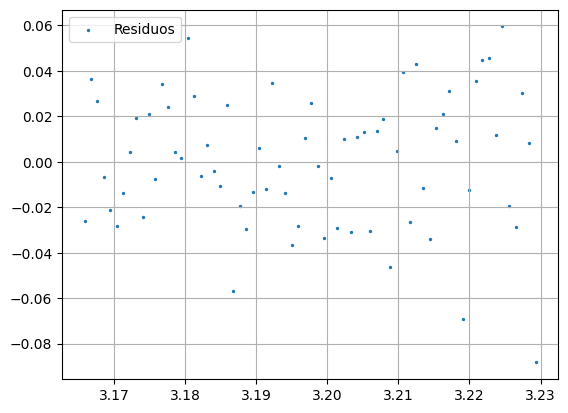

-2.9968084995019613 0.6984821466112492


In [190]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y1 == np.max(y1))[0][0]]

mask_lin = (x>3.165) & (x<3.23) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[1])
# mask_joda = y_lin<.36
# x_lin = x_lin[mask_joda]
# y_lin = y_lin[mask_joda]

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y1, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)

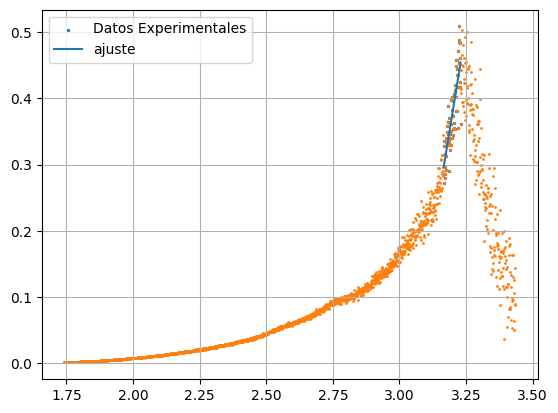

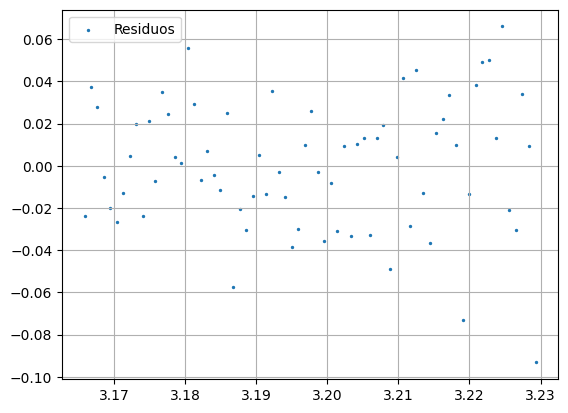

-3.0470654060633886 0.6953041747310876


In [191]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y2 == np.max(y2))[0][0]]

mask_lin = (x>3.165) & (x<3.23) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[2])

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y2, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)

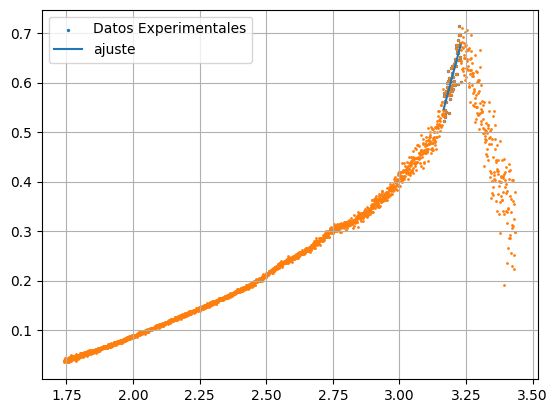

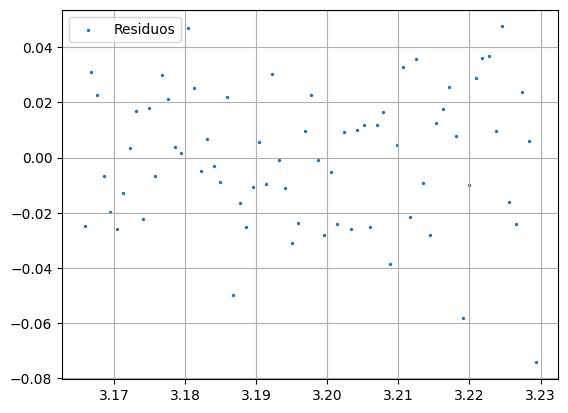

-2.8961865642274316 0.7009958735343631


In [193]:
from scipy.stats import linregress
from scipy.constants import h, e

x_max = x[mask][np.where(y3 == np.max(y3))[0][0]]

mask_lin = (x>3.165) & (x<3.23) 

x_lin = x[mask_lin]
y_lin = (F[mask_lin]* x[mask_lin]  )**(1/n[3])

slope, intercept, r_value, p_value, std_err = linregress(x_lin, y_lin)

plt.scatter(x_lin, y_lin, s=2, label = 'Datos Experimentales')
plt.plot(x_lin, slope*x_lin + intercept, label = 'ajuste')
plt.scatter(x[mask],y3, s=1 )
plt.legend()
plt.grid()

plt.show()

plt.scatter(x_lin, y_lin- (slope*x_lin + intercept), s=2, label = 'Residuos')
plt.legend()
plt.grid()


plt.show()

print(intercept/(slope),r_value**2)